<a href="https://colab.research.google.com/github/jesuslimac/MINERIA-DE-DATOS/blob/main/Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

Paso 01: Importar la libreria de visualización estadística seaborn

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

Paso 02: enlistamos los nombres de las columnas como caracteristicas, y las extraemos en x, y en y se extrae la columna correspondiente a la
etiqueta

In [ ]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x = dataset[feature_cols]
y = dataset.Outcome

In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
X_train.head(3)

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
762,9,0,22.5,33,89,62,0.142
127,1,94,33.3,23,118,58,0.261
564,0,0,32.4,27,91,80,0.601


In [ ]:
Y_train.head(3)

762    0
127    0
564    0
Name: Outcome, dtype: int64

In [ ]:
logRegresion = LogisticRegression(max_iter=1000)
logRegresion.fit(X_train, Y_train)
y_pred = logRegresion.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
matriz_confusion = metrics.confusion_matrix(Y_test, y_pred)
matriz_confusion

array([[118,  12],
       [ 26,  36]])

Text(0.5, 257.44, 'Etiqueta prediccion')

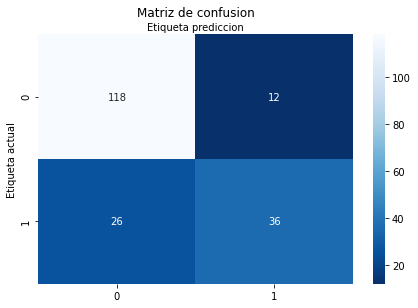

In [ ]:
import numpy as np
nombre_clases = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(nombre_clases))
plt.xticks(tick_marks, nombre_clases)
plt.yticks(tick_marks, nombre_clases)
sns.heatmap(pd.DataFrame(matriz_confusion),annot=True, cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion',y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta prediccion')



*   118 muestras clasificadas correctamente (dijo hay diabetes y tenia diabetes)
*   36 muestras clasificadas correctamente cuando es un negativo (dijo no hay diabetes y no tenia diabetes)
*   12 muestras clasificadas incorrectamente como negativos
*   26 muestras clasificados incorrectamente como negativos



In [ ]:
print('Exactitud', metrics.accuracy_score(Y_test,y_pred))

Exactitud 0.8020833333333334
